In [24]:
import DMM_socket as d
import matplotlib.pyplot as plt
import numpy as np
#from scipy.signal import butter, lfilter,lfilter_zi
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import math as m
import statistics as stat
import time
import allantools
#from allan_variance import allan_variance, params_from_avar


Rrite time= 0.0004780292510986328 [sec.]
Sigma= 2.556347394273238e-06 Begin= 7.01610176 End= 7.0161216   len= 60198


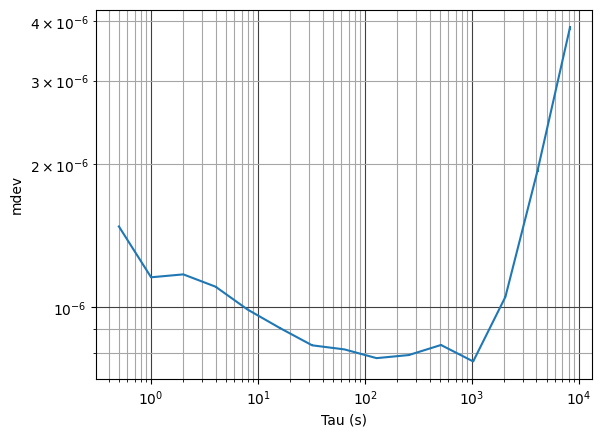

In [32]:
#f_name='hp34970.pkl'
f_name='array3500.pkl'
#f_name='hp34970.pkl'
f=d.fast_file()
data_set= f.load (f_name)
data_set[0] = data_set[10] #first sample is alway wrong . Overwrite it
Fs = 2
len = data_set.size
print ('Sigma=',np.std(data_set[55000:55200]),'Begin=',data_set[1],'End=',data_set[len-1],'  len=',len)
# Compute a deviation using the Dataset class
a = allantools.Dataset(data=data_set, rate=2.0, data_type='freq')
a.compute("mdev")
# New in 2019.7 : write results to file
#a.write_result("output.dat")
# Plot it using the Plot class
b = allantools.Plot()
# New in 2019.7 : additional keyword arguments are passed to
# matplotlib.pyplot.plot()
b.plot(a, errorbars=True, grid=True)
# You can override defaults before "show" if needed
b.ax.set_xlabel("Tau (s)")
b.show()

-1.280000000214443e-06    4.480000000306461e-06


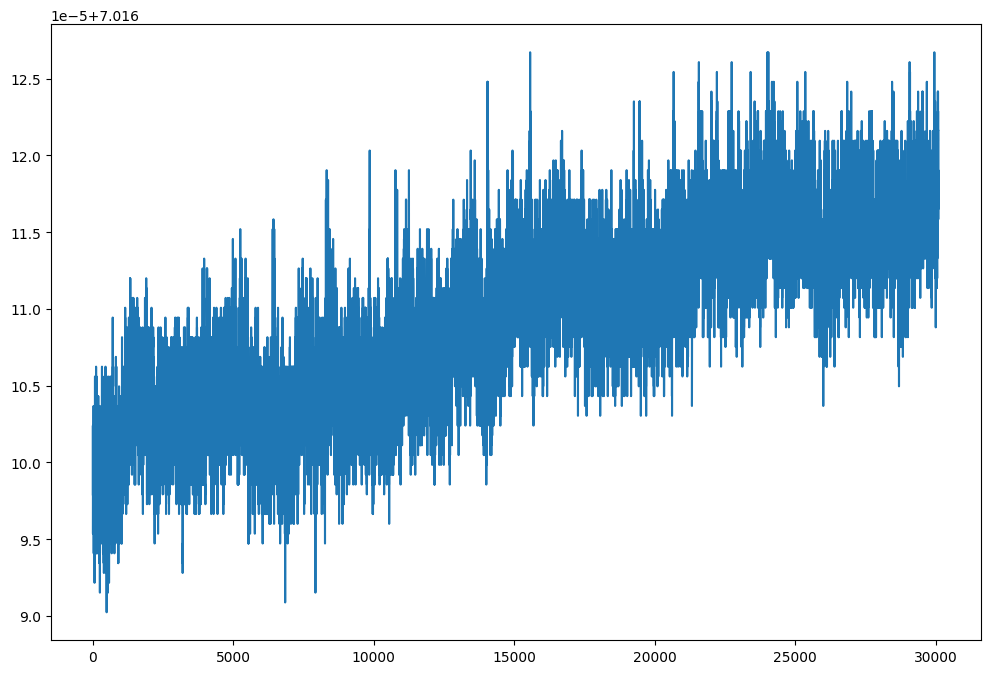

In [27]:
t=np.linspace (0,int(len/Fs),int(len))
plt.figure(figsize=(12,8))
plt.plot(t,data_set)
print (data_set[101]-data_set[102], '  ',data_set[102]-data_set[103])
plt.show()

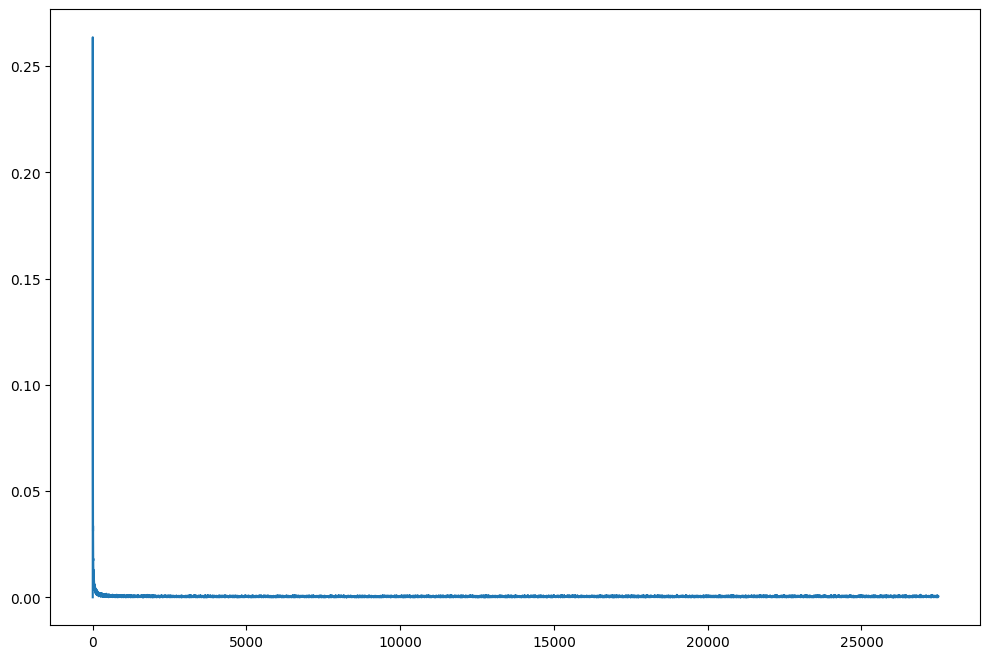

In [5]:
sp = np.fft.fft(data_set-np.mean(data_set))
#freq = np.fft.fftfreq(data_set)
plt.figure(figsize=(12,8))
#plt.plot(freq, sp.real, freq, sp.imag)
ampl=np.sqrt(sp.real*sp.real+sp.imag*sp.imag)
#plt.plot(ampl[600:650])
plt.plot(ampl[:int(len/2-1)])
plt.show()